In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src')
from features.Pipeline import Pipeline

import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
wave_pipe = Pipeline("waveform")
stft_pipe = Pipeline("stft")
mel_pipe = Pipeline("mel")
mfcc_pipe = Pipeline("mfcc")
cqt_pipe = Pipeline("cqt")

# file_path = '../data/raw/NSynth/audio/bass_synthetic_068-022-075.wav'
file_path = '../data/raw/Single-bass/bass_electronic_018-026-127.wav'

wave_spectro = wave_pipe.process(file_path)
stft_spectro = stft_pipe.process(file_path)
mel_spectro = mel_pipe.process(file_path)
mfcc_spectro = mfcc_pipe.process(file_path)
cqt_spectro = cqt_pipe.process(file_path)

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


In [4]:
print(f'WAVE transformation result shape: {wave_spectro.shape}')
print(f'STFT transformation result shape: {stft_spectro.shape}')
print(f'MEL transformation result shape: {mel_spectro.shape}')
print(f'MFCC transformation result shape: {mfcc_spectro.shape}')
print(f'CQT transformation result shape: {cqt_spectro.shape}')

WAVE transformation result shape: torch.Size([88200])
STFT transformation result shape: torch.Size([513, 160])
MEL transformation result shape: torch.Size([1024, 160])
MFCC transformation result shape: torch.Size([20, 173])
CQT transformation result shape: torch.Size([84, 173])


In [5]:
def draw_spectro(spectro, name="Mel-Spectrogram (dB)"):
    mel_spectro = np.abs(spectro)
    power_to_db = librosa.power_to_db(mel_spectro, ref=np.max)
    plt.figure(figsize=(10, 5))
    librosa.display.specshow(power_to_db, sr=22050, x_axis='time', y_axis='mel', cmap='magma', 
    hop_length=512)
    plt.colorbar(label='dB')
    plt.title(name, fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Frequency', fontdict=dict(size=15))
    plt.show()

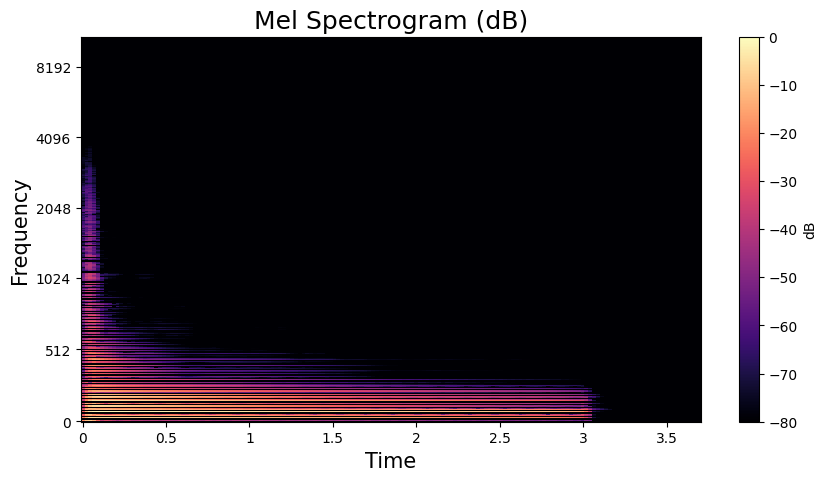

In [6]:
# draw_spectro(wave_spectro)
# draw_spectro(stft_spectro, name="Stft Spectrogram (dB)")
draw_spectro(mel_spectro, name="Mel Spectrogram (dB)")
# draw_spectro(mfcc_spectro, name="Mfcc Spectrogram (dB)")
# draw_spectro(cqt_spectro, name="Cqt Spectrogram (dB)")

In [7]:
# wave_audio_back = wave_pipe.post_process(wave_spectro)
# stft_audio_back = stft_pipe.post_process(stft_spectro)
mel_audio_back = mel_pipe.post_process(mel_spectro)
# mfcc_audio_back = mfcc_pipe.post_process(mfcc_spectro)
# cqt_audio_back = cqt_pipe.post_process(cqt_spectro)

C:\Users\micha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\feature\inverse.py:99: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(


In [8]:
# print(wave_audio_back.shape)
# print(stft_audio_back.shape)
print(mel_audio_back.shape)
# print(mfcc_audio_back.shape)
# print(cqt_audio_back.shape)

(81408,)


In [9]:
# print(wave_audio_back)
# print(stft_audio_back)
print(mel_audio_back)
# print(mfcc_audio_back)
# print(cqt_audio_back)

[-0.01908655 -0.02423511 -0.0248103  ...  0.          0.
  0.        ]


In [10]:
# sf.write('wave_process.wav', data=wave_audio_back, samplerate=wave_pipe.input_sr, subtype='PCM_24')
# sf.write('stft_process.wav', data=stft_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
sf.write('mel_process.wav', data=mel_audio_back, samplerate=stft_pipe.input_sr, subtype='PCM_24')
# sf.write('mfcc_process.wav', data=mfcc_audio_back, samplerate=mfcc_pipe.input_sr, subtype='PCM_24')
# sf.write('cqt_process.wav', data=cqt_audio_back, samplerate=cqt_pipe.input_sr, subtype='PCM_24')